# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "q=" + city + "&appid=" + weather_api_key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | longyearbyen
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | vilyuchinsk
Processing Record 6 of Set 1 | whitehorse
Processing Record 7 of Set 1 | tiksi
Processing Record 8 of Set 1 | puerto natales
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | edinburgh of the seven seas
Processing Record 12 of Set 1 | pacific grove
Processing Record 13 of Set 1 | derzhavinsk
Processing Record 14 of Set 1 | vorgashor
Processing Record 15 of Set 1 | horta
Processing Record 16 of Set 1 | as samawah
Processing Record 17 of Set 1 | achacachi
Processing Record 18 of Set 1 | sassandra
Processing Record 19 of Set 1 | ugoofaaru
Processing Record 20 of Set 1 | kabwe
Processing Record 21 of Set 1 | ilulissat
Processing Record 22 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,longyearbyen,78.2186,15.6401,268.06,68,40,5.14,SJ,1684369231
1,yellowknife,62.4560,-114.3525,287.44,41,20,6.17,CA,1684369231
2,blackmans bay,-43.0167,147.3167,281.89,78,53,3.48,AU,1684369231
3,ribeira grande,38.5167,-28.7000,291.36,88,100,2.65,PT,1684369231
4,vilyuchinsk,52.9306,158.4028,279.30,84,100,3.83,RU,1684369231


In [8]:
import os

# Create the output_data directory if it doesn't exist
os.makedirs("output_data", exist_ok=True)

# Export the City_Data into a CSV
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")



In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,longyearbyen,78.2186,15.6401,268.06,68,40,5.14,SJ,1684369231
1,yellowknife,62.4560,-114.3525,287.44,41,20,6.17,CA,1684369231
2,blackmans bay,-43.0167,147.3167,281.89,78,53,3.48,AU,1684369231
3,ribeira grande,38.5167,-28.7000,291.36,88,100,2.65,PT,1684369231
4,vilyuchinsk,52.9306,158.4028,279.30,84,100,3.83,RU,1684369231


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

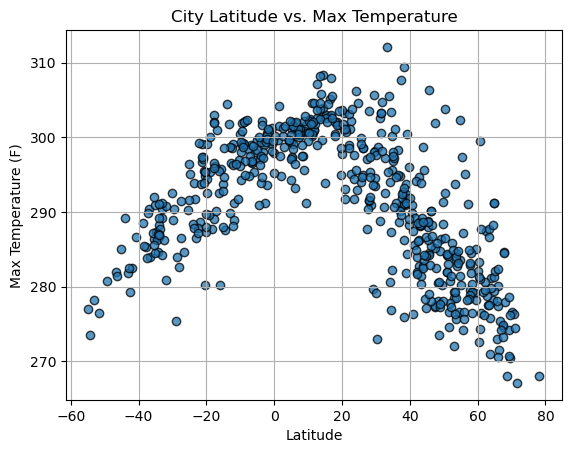

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", alpha=0.75)

# Set the title and labels
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Set the grid lines
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

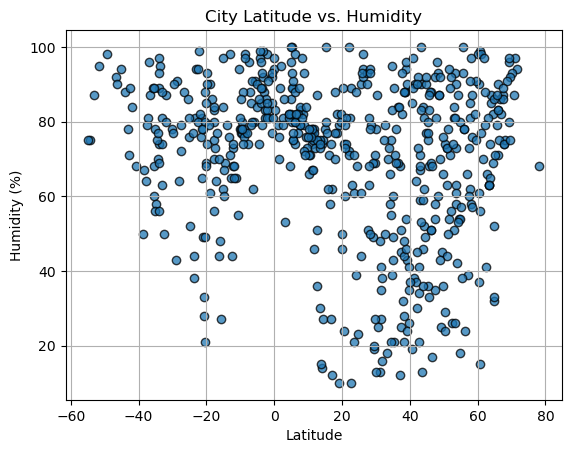

In [11]:
# Build scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", alpha=0.75)

# Set the title and labels
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Set the grid lines
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

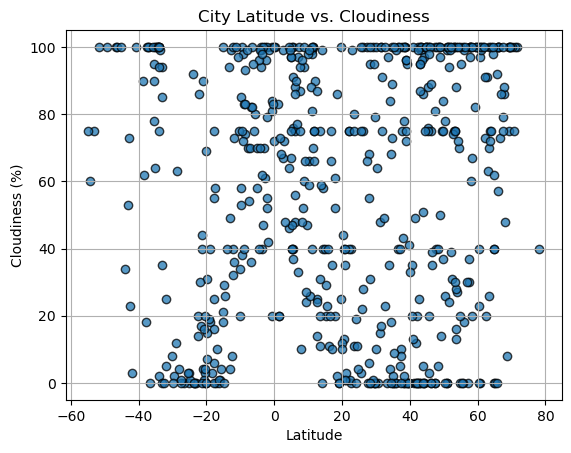

In [12]:
# Build scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", alpha=0.75)

# Set the title and labels
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Set the grid lines
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

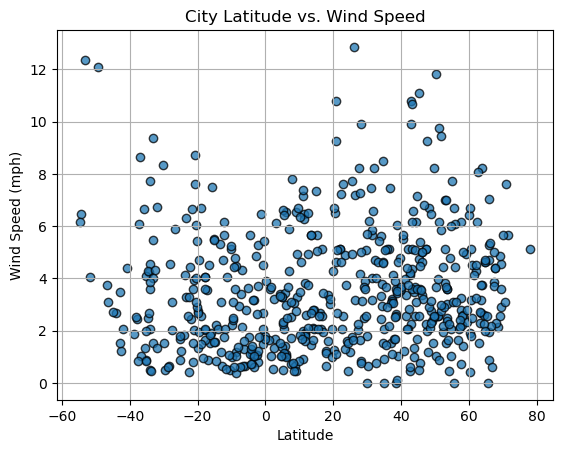

In [13]:
# Build scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", alpha=0.75)

# Set the title and labels
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Set the grid lines
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
def create_linear_regression_plots(x_values, y_values, x_label, y_label, title, output_file):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept

    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolor="black", alpha=0.75)

    # Plot the linear regression line
    plt.plot(x_values, regress_values, "r-", linewidth=1)

    # Set the title and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Set the grid lines
    plt.grid(True)

    # Annotate the linear regression equation and correlation coefficient
    equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    correlation_coefficient = f"r = {round(r_value, 2)}"
    plt.annotate(equation, (min(x_values), min(y_values)), fontsize=12, color="red")
    plt.annotate(correlation_coefficient, (min(x_values), min(y_values) + 10), fontsize=12, color="red")

    # Save the figure
    plt.savefig(output_file)

    # Show plot
    plt.show()


In [15]:
# Create a DataFrame with Northern Hemisphere data
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,longyearbyen,78.2186,15.6401,268.06,68,40,5.14,SJ,1684369231
1,yellowknife,62.4560,-114.3525,287.44,41,20,6.17,CA,1684369231
3,ribeira grande,38.5167,-28.7000,291.36,88,100,2.65,PT,1684369231
4,vilyuchinsk,52.9306,158.4028,279.30,84,100,3.83,RU,1684369231
5,whitehorse,60.7161,-135.0538,299.58,15,0,5.14,CA,1684369231


In [16]:
# Create a DataFrame with Southern Hemisphere data
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,blackmans bay,-43.0167,147.3167,281.89,78,53,3.48,AU,1684369231
7,puerto natales,-51.7236,-72.4875,276.49,95,100,4.05,CL,1684369232
8,port-aux-francais,-49.3500,70.2167,280.81,98,100,12.09,TF,1684369232
9,puerto ayora,-0.7393,-90.3518,299.57,92,84,2.68,EC,1684369232
10,edinburgh of the seven seas,-37.0676,-12.3116,290.46,96,100,8.64,SH,1684369232


###  Temperature vs. Latitude Linear Regression Plot

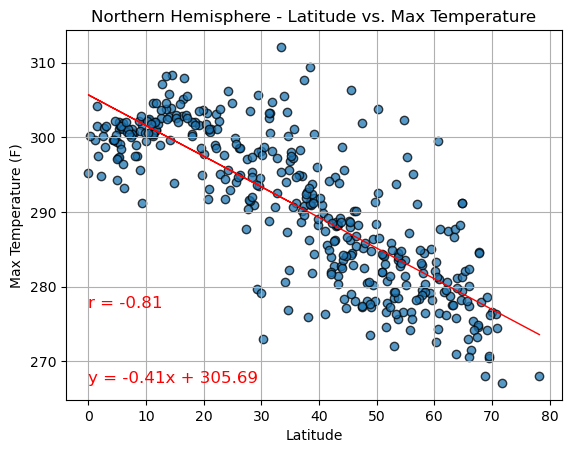

In [17]:
# Perform linear regression on Northern Hemisphere data
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the create_linear_regression_plots function
create_linear_regression_plots(x_values, y_values, "Latitude", "Max Temperature (F)",
                               "Northern Hemisphere - Latitude vs. Max Temperature", "output_data/Northern_Hemi_Regression.png")


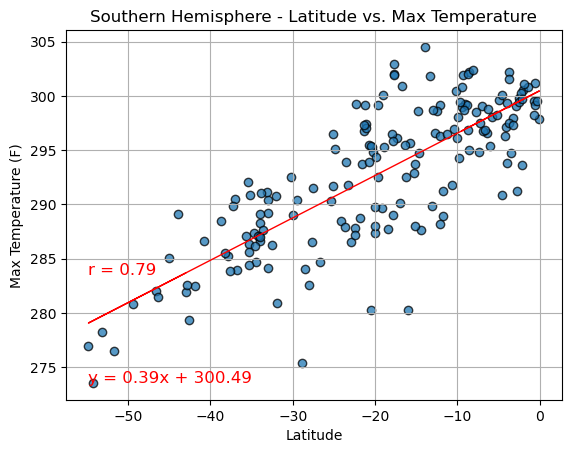

In [18]:
# Perform linear regression on Southern Hemisphere data
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the create_linear_regression_plots function
create_linear_regression_plots(x_values, y_values, "Latitude", "Max Temperature (F)",
                               "Southern Hemisphere - Latitude vs. Max Temperature", "output_data/Southern_Hemi_Regression.png")


When analyzing the linear regression plots for both the Northern Hemisphere and Southern Hemisphere, we can observe the relationship between latitude and maximum temperature.

1. Northern Hemisphere:
   - There is a negative linear relationship between latitude and maximum temperature in the Northern Hemisphere. As the latitude increases (moving towards the North Pole), the maximum temperature tends to decrease.
   - The scatter plot shows a downward trend, and the linear regression line has a negative slope.
   - The correlation coefficient (r-value) can provide an indication of the strength and direction of the relationship. A negative r-value close to -1 suggests a strong negative linear relationship.

2. Southern Hemisphere:
   - There is a positive linear relationship between latitude and maximum temperature in the Southern Hemisphere. As the latitude increases (moving towards the South Pole), the maximum temperature tends to increase.
   - The scatter plot shows an upward trend, and the linear regression line has a positive slope.
   - The correlation coefficient (r-value) can provide insight into the strength and direction of the relationship. A positive r-value close to 1 suggests a strong positive linear relationship.

These observations indicate that there is a clear association between latitude and maximum temperature in both hemispheres. However, it's important to note that the linear regression analysis only captures the overall trend and might not capture all the underlying complexities of the relationship. Other factors such as altitude, proximity to large bodies of water, and local weather patterns can also influence temperature variations.

The linear regression plots and their corresponding statistics provide a useful visualization and quantitative measure of the relationship between latitude and maximum temperature in each hemisphere.

### Humidity vs. Latitude Linear Regression Plot

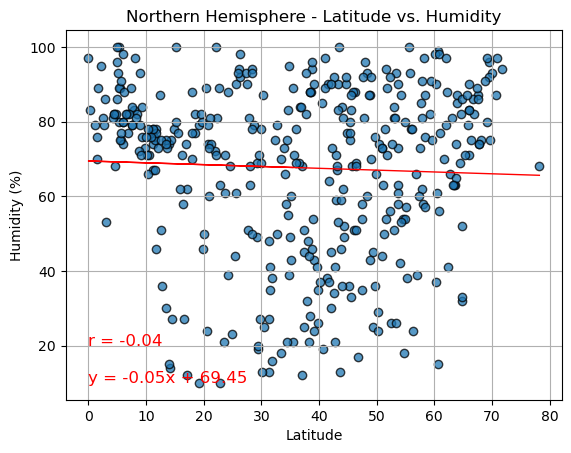

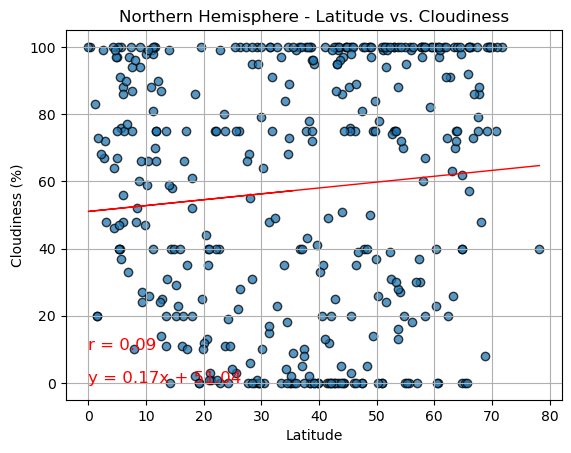

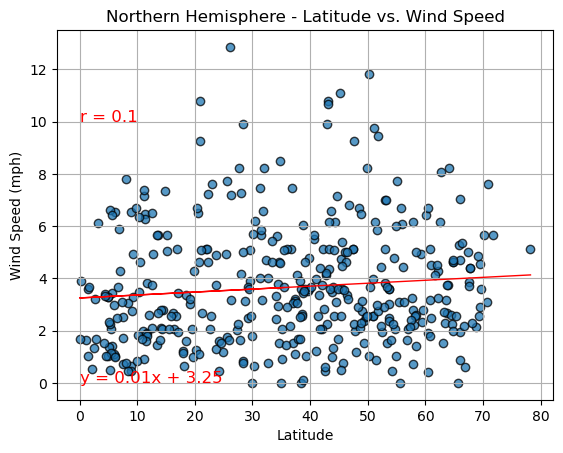

In [19]:
# Northern Hemisphere - Latitude vs. Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

create_linear_regression_plots(x_values, y_values, "Latitude", "Humidity (%)",
                               "Northern Hemisphere - Latitude vs. Humidity", "output_data/Northern_Hemi_Humidity_Regression.png")

# Northern Hemisphere - Latitude vs. Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

create_linear_regression_plots(x_values, y_values, "Latitude", "Cloudiness (%)",
                               "Northern Hemisphere - Latitude vs. Cloudiness", "output_data/Northern_Hemi_Cloudiness_Regression.png")

# Northern Hemisphere - Latitude vs. Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

create_linear_regression_plots(x_values, y_values, "Latitude", "Wind Speed (mph)",
                               "Northern Hemisphere - Latitude vs. Wind Speed", "output_data/Northern_Hemi_Wind_Speed_Regression.png")


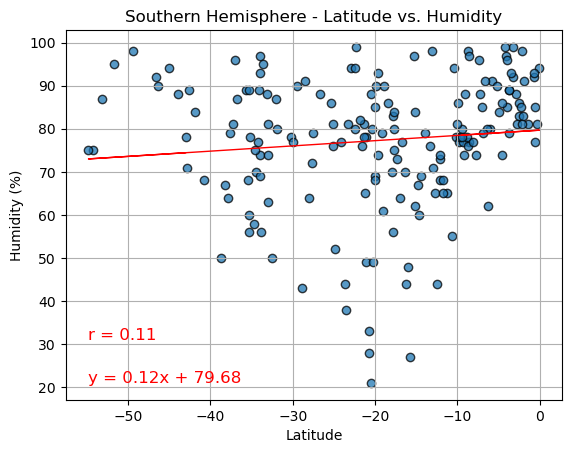

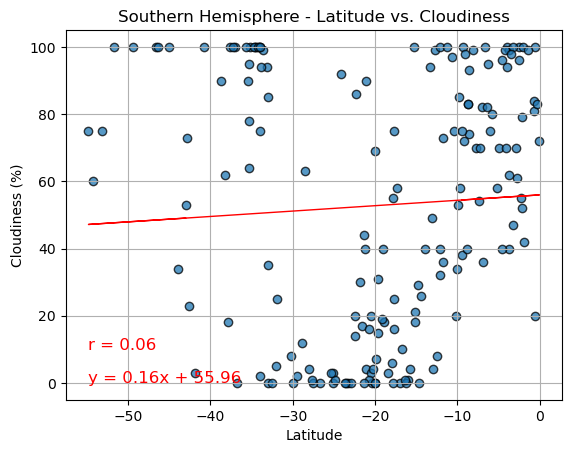

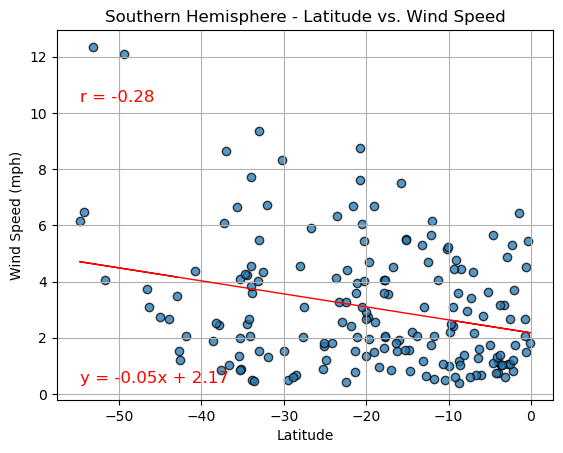

In [20]:
# Southern Hemisphere - Latitude vs. Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

create_linear_regression_plots(x_values, y_values, "Latitude", "Humidity (%)",
                               "Southern Hemisphere - Latitude vs. Humidity", "output_data/Southern_Hemi_Humidity_Regression.png")

# Southern Hemisphere - Latitude vs. Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

create_linear_regression_plots(x_values, y_values, "Latitude", "Cloudiness (%)",
                               "Southern Hemisphere - Latitude vs. Cloudiness", "output_data/Southern_Hemi_Cloudiness_Regression.png")

# Southern Hemisphere - Latitude vs. Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

create_linear_regression_plots(x_values, y_values, "Latitude", "Wind Speed (mph)",
                               "Southern Hemisphere - Latitude vs. Wind Speed", "output_data/Southern_Hemi_Wind_Speed_Regression.png")
